In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
#wczytanie danych
with open("opinions.txt","r",encoding="utf-8") as f:
  lines = [line.strip() for line in f if line.strip()]

In [3]:
#heurystyczne przzypisywanie etykiet
texts = lines
labels = [1 if "!" in line else 0 for line in lines] #1 - pozytywna, 0- negatywna


In [4]:
#tokenizacja tekstu
tokenizer = Tokenizer(num_words=1000,oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences,maxlen=100,padding="post")

In [5]:
#podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [7]:
#budowa modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
#kompilacja model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#trenowanie modelu
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=70,
    validation_data=(np.array(X_test), np.array(y_test))
    )

Epoch 1/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4981 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6940
Epoch 2/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5110 - loss: 0.6925 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 3/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5198 - loss: 0.6921 - val_accuracy: 0.4500 - val_loss: 0.6942
Epoch 4/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5291 - loss: 0.6916 - val_accuracy: 0.4500 - val_loss: 0.6949
Epoch 5/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5118 - loss: 0.6919 - val_accuracy: 0.4500 - val_loss: 0.6951
Epoch 6/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4846 - loss: 0.6933 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 7/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5367 - loss: 0.6904 - val_accuracy: 0.4500 - val_loss: 0.6949
Epoch 8/70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4863 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6943


In [11]:
#ewaluacja modelu
loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9028 - loss: 0.4899
Loss: 0.4844645857810974
Accuracy: 0.9166666865348816


Text(0.5, 0, 'Epoch')

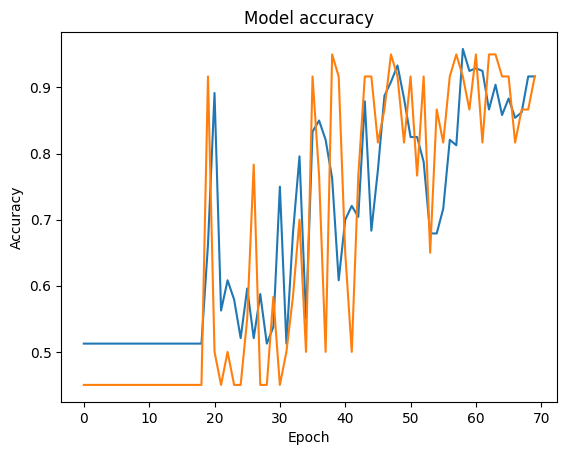

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [13]:
# Lista 20 wypowiedzi testowych
test_sentences = [
    "I absolutely love this product!",
    "Terrible experience, I will never buy this again.",
    "Great quality and fast delivery.",
    "Completely useless and a waste of money.",
    "Highly recommend it to everyone!",
    "Awful packaging and very slow shipping.",
    "This is the best purchase I made this year!",
    "Not satisfied, the item broke after two days.",
    "Super helpful and kind customer service!",
    "Disappointed with how it turned out.",
    "Amazing quality, exceeded my expectations!",
    "The product stopped working after a week.",
    "Really fast shipping and nice packaging.",
    "Customer service was not helpful at all.",
    "It's okay, nothing special.",
    "Absolutely fantastic, I'm impressed!",
    "Won’t be buying from this seller again.",
    "Love it! Will order again soon.",
    "Worst purchase I've ever made.",
    "Top-notch quality and very reliable."
]


In [14]:
# Tokenizacja tekstów
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(test_sentences)
sequences = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(sequences, maxlen=20, padding='post')

In [15]:
# Predykcja sentymentu
predictions = model.predict(padded)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [16]:
# Wyświetl wyniki
for i, sentence in enumerate(test_sentences):
    label = "POSITIVE" if predictions[i] > 0.5 else "NEGATIVE"
    print(f"{label} ({predictions[i][0]:.2f}): {sentence}")

NEGATIVE (0.15): I absolutely love this product!
POSITIVE (0.88): Terrible experience, I will never buy this again.
NEGATIVE (0.48): Great quality and fast delivery.
NEGATIVE (0.05): Completely useless and a waste of money.
NEGATIVE (0.44): Highly recommend it to everyone!
NEGATIVE (0.17): Awful packaging and very slow shipping.
NEGATIVE (0.12): This is the best purchase I made this year!
NEGATIVE (0.30): Not satisfied, the item broke after two days.
POSITIVE (0.70): Super helpful and kind customer service!
NEGATIVE (0.32): Disappointed with how it turned out.
POSITIVE (0.65): Amazing quality, exceeded my expectations!
NEGATIVE (0.23): The product stopped working after a week.
POSITIVE (0.86): Really fast shipping and nice packaging.
NEGATIVE (0.37): Customer service was not helpful at all.
NEGATIVE (0.44): It's okay, nothing special.
NEGATIVE (0.33): Absolutely fantastic, I'm impressed!
NEGATIVE (0.23): Won’t be buying from this seller again.
POSITIVE (0.56): Love it! Will order again